# Self Attention in Transformers

In [1]:
import numpy as np 
import math 


L, d_k, d_v = 4, 8, 8
q = np.random.randn(L, d_k)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

In [2]:
print("Q\n", q)
print("K\n", k)
print("V\n", v)

Q
 [[ 0.42639545 -0.14750816  1.20058398 -0.23310401  1.70336859 -0.00644859
  -1.94201439  0.62941988]
 [-0.23197754 -0.93558371  1.24550005  0.63333462 -0.39052655 -0.43716867
   1.27518761 -0.62483366]
 [ 0.28885182  1.14288872 -1.41678133  1.1968535  -1.64383917 -0.75516231
  -0.31334341 -1.10483139]
 [-1.98028379 -0.77179123  0.59467089  0.15253073  0.85177876  0.50856472
   0.16502912  0.37288479]]
K
 [[-0.67472111  1.00395964  0.07499845  3.14504906  0.78688452 -0.19955353
   0.80037524  0.05360393]
 [ 1.5169396  -0.7661733   1.52156611  0.05756113  1.59052869 -0.0648331
   1.04913153 -0.73139845]
 [ 1.65246361 -0.08914699 -0.10161615  0.21183951  1.33964287  1.54543946
  -0.07892107 -0.72544209]
 [ 0.01854859 -0.99078158  0.57808644  0.93955904  0.20507054 -1.00794267
   1.39476614 -0.53686085]]
V
 [[-0.15667422 -0.25297533  0.98637787 -1.21052519  0.14008743 -0.11860376
  -0.91613314 -0.61867318]
 [ 1.27346853 -0.24936136 -0.33065819  0.07115656 -0.00448843  1.02634922
   2.66

## Self attention 

softmax(Q.K^T / sqrt(d_k) +M). V

In [3]:
np.matmul(q, k.T)

array([[-1.25783152,  2.78507256,  2.51497136, -2.06167256],
       [ 2.06958522,  3.49853067, -1.13846996,  4.71231092],
       [ 3.1575944 , -4.61059461, -1.7700537 , -0.24134559],
       [ 1.80644698, -0.27681753, -1.58815544,  0.9070883 ]])

In [4]:
q.var(), k.var(), np.matmul(q, k.T).var()

(0.9208095192447721, 0.9164889113306682, 6.0325485438938715)

In [5]:
scaled = np.matmul(q, k.T) / math.sqrt(d_k)
q.var(), k.var(), scaled.var()

(0.9208095192447721, 0.9164889113306682, 0.7540685679867338)

In [6]:
scaled

array([[-0.4447106 ,  0.98467185,  0.88917665, -0.72891132],
       [ 0.73170887,  1.23691738, -0.40250991,  1.6660535 ],
       [ 1.11637821, -1.63009136, -0.62580849, -0.08532855],
       [ 0.63867545, -0.09786978, -0.56149774,  0.32070414]])

## Masking

* This is to ensure words don't get context from words generated in the future.
* Not required in the encoders, but required in the decoders

In [7]:
mask = np.tril(np.ones((L,L)))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [8]:
mask[mask == 0] = -np.inf
mask[mask == 1] = 0
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [9]:
scaled + mask

array([[-0.4447106 ,        -inf,        -inf,        -inf],
       [ 0.73170887,  1.23691738,        -inf,        -inf],
       [ 1.11637821, -1.63009136, -0.62580849,        -inf],
       [ 0.63867545, -0.09786978, -0.56149774,  0.32070414]])

In [10]:
def softmax(x):
    return (np.exp(x).T / np.sum(np.exp(x), axis =-1)).T

In [11]:
attention = softmax(scaled + mask)
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.37631743, 0.62368257, 0.        , 0.        ],
       [0.80691301, 0.05176666, 0.14132033, 0.        ],
       [0.39879869, 0.19093089, 0.12009506, 0.29017536]])

In [12]:
new_v = np.matmul(attention, v)

In [13]:
new_v

array([[-0.15667422, -0.25297533,  0.98637787, -1.21052519,  0.14008743,
        -0.11860376, -0.91613314, -0.61867318],
       [ 0.73528088, -0.25072136,  0.16496544, -0.41116262,  0.04991798,
         0.59548345,  1.32029836,  0.41075051],
       [ 0.00702077, -0.07326416,  0.49420698, -0.87416648,  0.31782938,
        -0.09941821, -0.65518017, -0.51859639],
       [-0.10351433,  0.06706468, -0.1235106 , -0.55129654,  0.00498165,
         0.32412566,  0.3627955 , -0.57858189]])

In [14]:
v

array([[-0.15667422, -0.25297533,  0.98637787, -1.21052519,  0.14008743,
        -0.11860376, -0.91613314, -0.61867318],
       [ 1.27346853, -0.24936136, -0.33065819,  0.07115656, -0.00448843,
         1.02634922,  2.66971584,  1.03188392],
       [ 0.47777995,  1.01735913, -2.01384385,  0.70010098,  1.45077047,
        -0.40224903, -0.38312031, -0.51512854],
       [-1.17706872,  0.32181194, -0.73021792, -0.57277547, -0.77283754,
         0.77115794,  0.91126906, -1.60940595]])

In [15]:
def scaled_dot_product_attention(q, k, v, mask=None):
    d_k = q.shape[-1]
    scaled = np.matmul(q, k.T) / math.sqrt(d_k)
    if mask is not None:
        scaled = scaled + mask
    attention = softmax(scaled)
    out = np.matmul(attention, v)
    return out, attention

In [16]:
values, attention = scaled_dot_product_attention(q, k, v, mask=None)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention\n", attention)

Q
 [[ 0.42639545 -0.14750816  1.20058398 -0.23310401  1.70336859 -0.00644859
  -1.94201439  0.62941988]
 [-0.23197754 -0.93558371  1.24550005  0.63333462 -0.39052655 -0.43716867
   1.27518761 -0.62483366]
 [ 0.28885182  1.14288872 -1.41678133  1.1968535  -1.64383917 -0.75516231
  -0.31334341 -1.10483139]
 [-1.98028379 -0.77179123  0.59467089  0.15253073  0.85177876  0.50856472
   0.16502912  0.37288479]]
K
 [[-0.67472111  1.00395964  0.07499845  3.14504906  0.78688452 -0.19955353
   0.80037524  0.05360393]
 [ 1.5169396  -0.7661733   1.52156611  0.05756113  1.59052869 -0.0648331
   1.04913153 -0.73139845]
 [ 1.65246361 -0.08914699 -0.10161615  0.21183951  1.33964287  1.54543946
  -0.07892107 -0.72544209]
 [ 0.01854859 -0.99078158  0.57808644  0.93955904  0.20507054 -1.00794267
   1.39476614 -0.53686085]]
V
 [[-0.15667422 -0.25297533  0.98637787 -1.21052519  0.14008743 -0.11860376
  -0.91613314 -0.61867318]
 [ 1.27346853 -0.24936136 -0.33065819  0.07115656 -0.00448843  1.02634922
   2.66

In [19]:
values, attention = scaled_dot_product_attention(q, k, v, mask=mask)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention\n", attention)

Q
 [[ 0.42639545 -0.14750816  1.20058398 -0.23310401  1.70336859 -0.00644859
  -1.94201439  0.62941988]
 [-0.23197754 -0.93558371  1.24550005  0.63333462 -0.39052655 -0.43716867
   1.27518761 -0.62483366]
 [ 0.28885182  1.14288872 -1.41678133  1.1968535  -1.64383917 -0.75516231
  -0.31334341 -1.10483139]
 [-1.98028379 -0.77179123  0.59467089  0.15253073  0.85177876  0.50856472
   0.16502912  0.37288479]]
K
 [[-0.67472111  1.00395964  0.07499845  3.14504906  0.78688452 -0.19955353
   0.80037524  0.05360393]
 [ 1.5169396  -0.7661733   1.52156611  0.05756113  1.59052869 -0.0648331
   1.04913153 -0.73139845]
 [ 1.65246361 -0.08914699 -0.10161615  0.21183951  1.33964287  1.54543946
  -0.07892107 -0.72544209]
 [ 0.01854859 -0.99078158  0.57808644  0.93955904  0.20507054 -1.00794267
   1.39476614 -0.53686085]]
V
 [[-0.15667422 -0.25297533  0.98637787 -1.21052519  0.14008743 -0.11860376
  -0.91613314 -0.61867318]
 [ 1.27346853 -0.24936136 -0.33065819  0.07115656 -0.00448843  1.02634922
   2.66

# Multihead attention

In [33]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [34]:
sequence_length = 4
batch_size = 1
input_dim = 512
d_model = 512
x = torch.randn( (batch_size, sequence_length, input_dim))

In [35]:
x.size()

torch.Size([1, 4, 512])

In [36]:
qkv_layer = nn.Linear(input_dim, 3*d_model)

In [37]:
qkv = qkv_layer(x)

In [38]:
qkv.size()

torch.Size([1, 4, 1536])

Text(0.5, 1.0, 'qkv distribution')

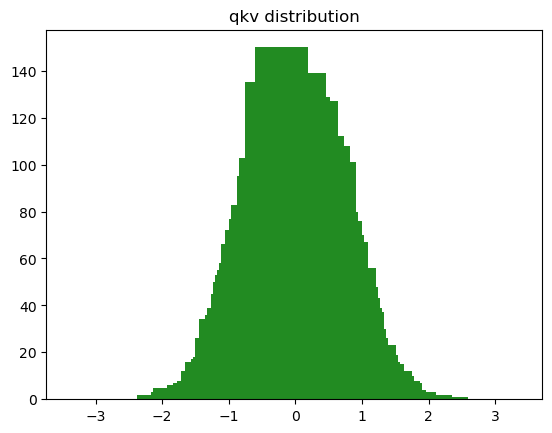

In [39]:
import matplotlib.pyplot as plt
y_val = torch.histc(qkv, bins=200, min=-3, max=3)
x_val = np.arange(-1, 1, 0.01) *3
plt.bar(x_val, y_val, align='center', color=['forestgreen'])
plt.title('qkv distribution')

In [40]:
num_heads = 8
head_dim = d_model // num_heads
qkv = qkv.reshape(batch_size, sequence_length, num_heads, 3* head_dim)

In [41]:
qkv.shape

torch.Size([1, 4, 8, 192])

In [42]:
qkv = qkv.permute(0,2,1,3) # [batch_size, num_heads, sequence_length, 3*head_dim]
qkv.shape

torch.Size([1, 8, 4, 192])

In [43]:
q, k, v = qkv.chunk(3, dim=-1)
q.shape, k.shape, v.shape

(torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]))

# Attention mechanism

## Self Attention for multiple heads

for a single head:


In [45]:
q.size()[-1]

64

In [46]:
d_k =  q.size()[-1]
scaled = torch.matmul(q, k.transpose(-2, -1)) /math.sqrt(d_k)